## Plots y visualizacion de Datos. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_data = "../datasets/customer-churn-model/Customer Churn Model.txt"
data = pd.read_csv(path_data)

In [3]:
data.head(3)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [4]:
# funcion para que el plot se conserve en linea.
# savefig('path guardar imagen') para guardar las imagenes en la ruta del servidor.
% matplotlib inline

UsageError: Line magic function `%` not found.


### Scatter Plot -> Nube de puntos dispersion

<Axes: xlabel='Day Mins', ylabel='Day Charge'>

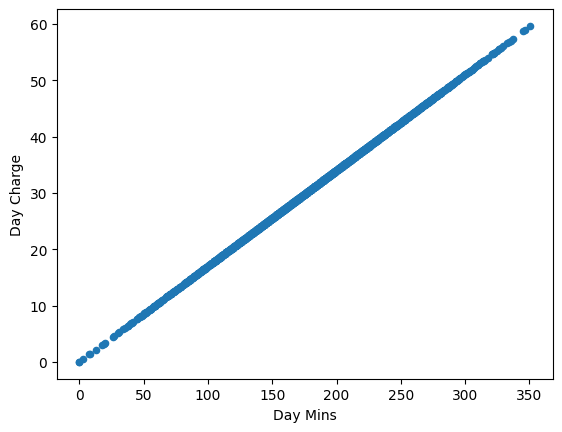

In [4]:
# ejejmplo relacionando la carga del movil con el tiempo de las llamadas
data.plot(kind="scatter", x="Day Mins", y="Day Charge")

<Axes: xlabel='Night Mins', ylabel='Night Charge'>

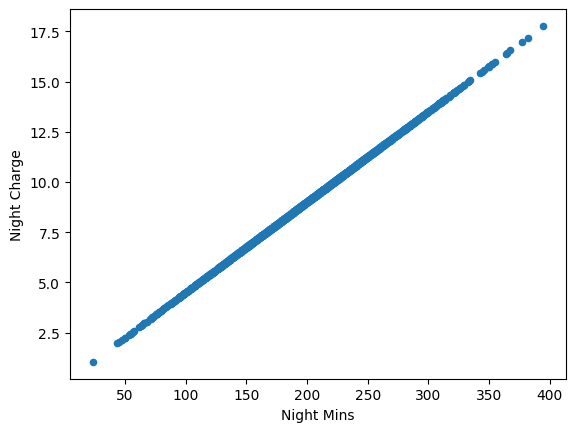

In [5]:
# ejejmplo relacionando la carga de Noche con el tiempo de las llamadas
data.plot(kind="scatter", x="Night Mins", y="Night Charge")

<Axes: xlabel='Night Calls', ylabel='Night Charge'>

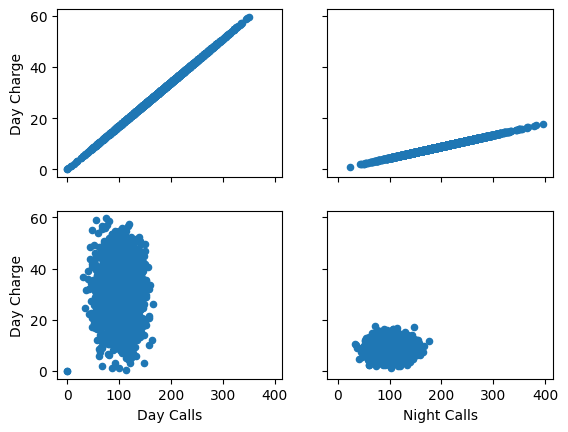

In [6]:
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)
data.plot(kind="scatter", x="Day Mins", y="Day Charge", ax=axs[0][0])
data.plot(kind="scatter", x="Night Mins", y="Night Charge", ax=axs[0][1])
data.plot(kind="scatter", x="Day Calls", y="Day Charge", ax=axs[1][0])
data.plot(kind="scatter", x="Night Calls", y="Night Charge", ax=axs[1][1])

### Histograma de frecuencias
- regla de Sturges para divisiones de los histogramas.
  - k = int(np.ceil(1+np.log2(M)
  - M = Tamaño de la muestra

Text(0.5, 1.0, 'Histograma de numero de llamadas al dia')

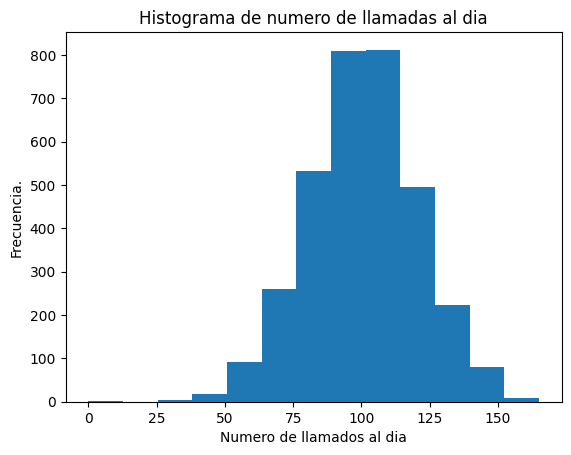

In [7]:
k = int(np.ceil(1+np.log2(3333))) # Regla de sturges

plt.hist(data["Day Calls"], bins=k) # bins = [0,30,60,90,120,150]
plt.xlabel("Numero de llamados al dia")
plt.ylabel("Frecuencia.")
plt.title("Histograma de numero de llamadas al dia")

### Boxplot, diagrama de caja y bigotes.

Text(0.5, 1.0, 'Boxplot de llamadas diarias')

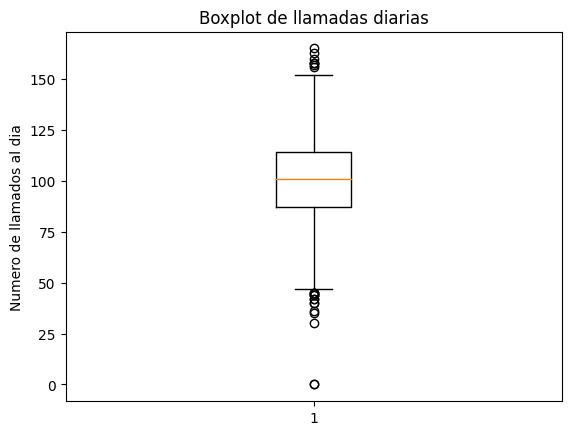

In [8]:
plt.boxplot(data["Day Calls"])
plt.ylabel("Numero de llamados al dia")
#plt.xlabel("Frecuencia.")
plt.title("Boxplot de llamadas diarias")

In [9]:
# Generando el rango intercuartilico IQR que corresponde al tamaño de la caja.
IQR = data["Day Calls"].quantile(0.75)-data["Day Calls"].quantile(0.25)
IQR

27.0

In [12]:
data["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [10]:
# Donde inicia el bigote se llama OUTLAYERS.
data["Day Calls"].quantile(0.25) -1.5*IQR

46.5

In [11]:
# Donde acaba el bigote se llama OUTLAYERS.
data["Day Calls"].quantile(0.75) + 1.5*IQR

154.5